# Замятин Алексей Б02-307




Text(0, 0.5, 'y (оценка температуры)')

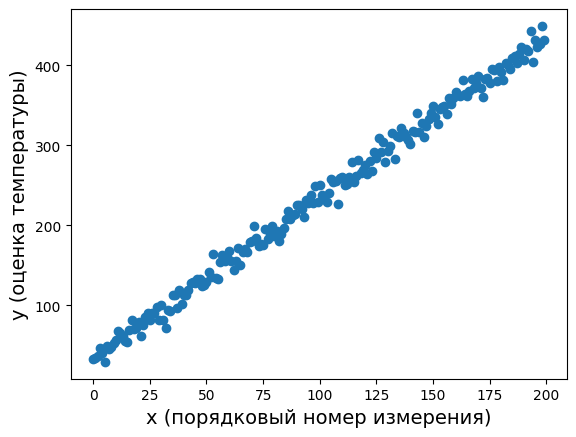

In [80]:
import random
import matplotlib.pyplot as plt
import numpy as np
def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1]*x[i] + noise[i]

    return x, y

coef_true = [34.2, 2.] # весовые коэффициенты
data_size = 200 # размер генерируемого набора данных
noise_sigma = 10 # СКО шума в данных
random_state = 42
x_scale, y_estimate = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

plt.plot(x_scale, y_estimate, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)



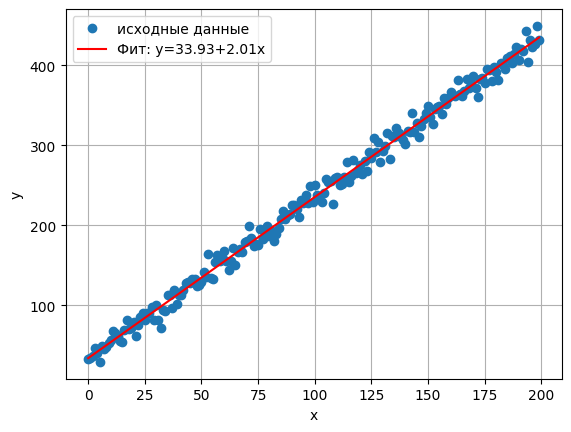

In [63]:
def linear_regression_fit(x, y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    w1 = np.sum((x - x_mean) * (y.flatten() - y_mean)) / np.sum((x - x_mean)**2)
    w0 = y_mean - w1 * x_mean
    return w0, w1


def polyfit_least_squares(x, y, n):
    X = np.vander(x, n + 1, increasing=True)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def plot_linear_regression(x, y):
    w0, w1 = linear_regression_fit(x,y)
    plt.figure()
    plt.plot(x, y, 'o', label='исходные данные')
    plt.plot(x, w0 + w1*x, 'r-', label=f'Фит: y={w0:.2f}+{w1:.2f}x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_polyfit_linear_regression(x, y, degree):
    w = polyfit_least_squares(x, y, degree).flatten()

    x_plot = np.linspace(np.min(x), np.max(x), 400)
    X_plot = np.vander(x_plot, degree + 1, increasing=True)
    y_plot = X_plot @ w

    def coeff_str(coeffs):
        parts = []
        for i, c in enumerate(coeffs):
            if i == 0:
                parts.append(f"{c:.2f}")
            elif i == 1:
                parts.append(f"{c:.2f}x")
            else:
                parts.append(f"{c:.2f}x^{i}")
        return " + ".join(parts)

    plt.plot(x, y, 'o', label='исходные данные')
    plt.plot(x_plot, y_plot, 'r-', label=f'Фит (deg={degree}): y={coeff_str(w)}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    
plot_linear_regression(x_scale, y_estimate)


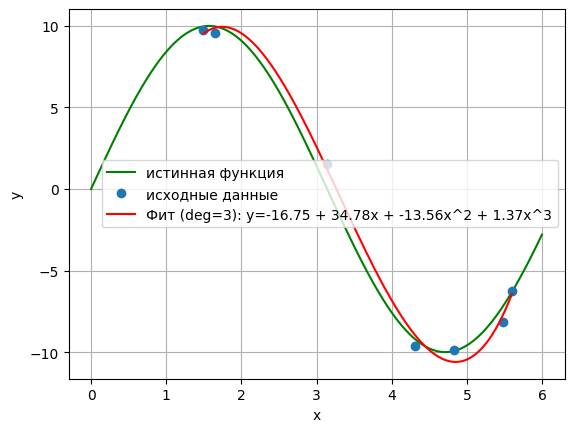

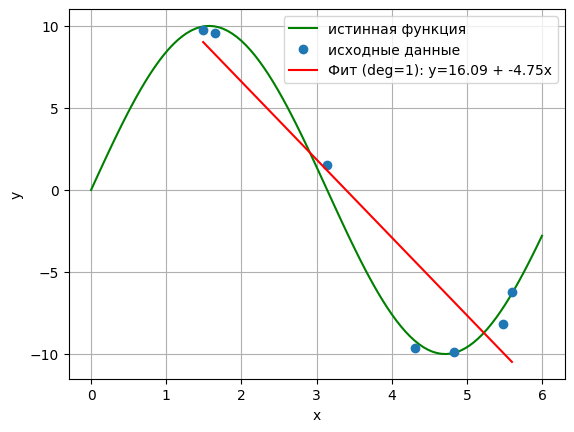

In [64]:
np.random.seed(1568)
n = 7
x = np.random.uniform(0, 6, n)
epsilon = np.random.normal(0, 1, n)
y = 10 * np.sin(x) + epsilon
x_linspace = np.linspace(0, 6, 100)
plt.plot(x_linspace, 10*np.sin(x_linspace), 'g-', label='истинная функция')
plot_polyfit_linear_regression(x, y, 3)
plt.figure()
plt.plot(x_linspace, 10*np.sin(x_linspace), 'g-', label='истинная функция')
plot_polyfit_linear_regression(x, y, 1)

In [65]:
def f(x):
 return 0.001 * x ** 5 + x ** 2 - 1

def fprime(x):
  return 0.001 * 5 * x ** 4 + 2 * x

def dihatomia(x1,x2,e):
    if(f(x1)*f(x2)>0):
        return None
    while (x2-x1) > e:
        x0 = (x1 + x2) / 2
        if f(x0) * f(x1) < 0:
            x2 = x0
        else:
            x1 = x0
    return (x1+x2) / 2
def newton(x0, f, fprime, e, MAX_IT=1000):
  x = x0
  for i in range(MAX_IT):
    dx = f(x) / fprime(x)
    if abs(dx) < e:
      return x
    x -= dx
  return None

print(dihatomia(0, 2, 0.1))
print(newton(1, f, fprime, 1e-6))




# по теореме о локализации 
# все корни находятся по модулю от 1/2 до 1001


def all_roots_dihatomia(f, a, b, d, e):
  roots = []
  x = a 
  while x < b:
    if f(x) * f(x + d) < 0:
      roots.append(dihatomia(x, x + d, e))
    x +=d
  return roots

def all_roots_newton(f, a, b, d, e):
  roots = []
  x = a
  while x < b:
    if f(x) * f(x + d) < 0:
      x0 = (x + x + d) / 2
      root = newton(x0, f, fprime, e)
      if root is not None:
        if not roots or abs(root - roots[-1]) > e:
          roots.append(root)
    x += d
  return roots

print(all_roots_dihatomia(f, -1001, 1001, 0.1, 1e-6))
print(all_roots_newton(f, -1001, 1001, 0.1, 1e-10))

0.96875
0.9995012468827931
[-9.966328048546936, -1.0005008695918778, 0.9995014192264815]
[-9.966327791849768, -1.000501128512885, 0.9995011215129309]


In [66]:
import numpy as np
import scipy.linalg as la
import time
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng

def matrix_pth_root_newton(A, p, tol=1e-8, maxiter=1000):
    """Вычисляет p-й корень 2×2 матрицы методом Ньютона.
    Возвращает (X, success), где success=True при сходимости.
    """
    A = np.array(A, dtype=float)
    eigs = np.linalg.eigvals(A)
    # Проверка, что все λ в S
    if not all((np.real(e) > 0 and abs(e) <= 1) or (np.isreal(e) and e > 0) for e in eigs):
        return None, False

    X = np.eye(2)
    for _ in range(maxiter):
        # Проверка, что X обратима
        if abs(np.linalg.det(X)) < 1e-12:
            return None, False
        try:
            X_next = (1/p) * ((p - 1) * X + np.linalg.matrix_power(X, 1 - p) @ A)
        except np.linalg.LinAlgError:
            return None, False
        if np.linalg.norm(X_next - X, 2) / np.linalg.norm(X_next, 2) < tol:
            return X_next, True
        X = X_next
    return X, False

Counts: [10, 50, 100, 200, 500]
Times: [0.009851455688476562, 0.13201260566711426, 0.07375955581665039, 0.3220939636230469, 0.4987518787384033]


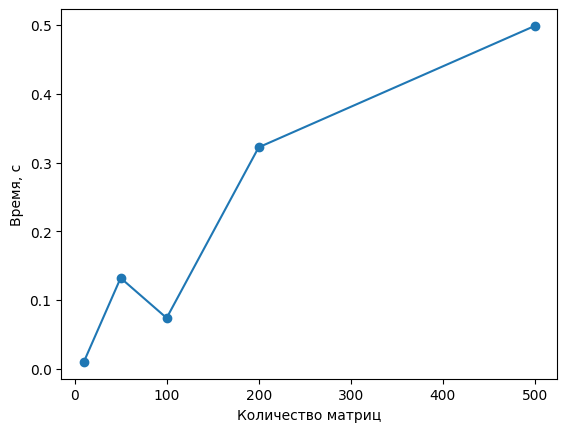

In [67]:

def generate_matrix_in_S():
    """Генерирует случайную 2×2 матрицу с собственными числами из множества S."""
    while True:
        A = np.random.rand(2, 2)
        eigs = np.linalg.eigvals(A)
        if all((np.real(e) > 0 and abs(e) <= 1) or (np.isreal(e) and e > 0) for e in eigs):
            return A


def test_time_vs_count(N, counts):
    """
    Возвращает два списка: counts и times.
    """
    times = []
    for count in counts:
        matrices = [generate_matrix_in_S() for _ in range(count)]
        start = time.time()
        for A in matrices:
            _, success = matrix_pth_root_newton(A, N)
        times.append(time.time() - start)
    return counts, times

N = 3
counts = [10, 50, 100, 200, 500]
counts, times = test_time_vs_count(N, counts)
print("Counts:", counts)
print("Times:", times)

plt.plot(counts, times, marker='o')
plt.xlabel('Количество матриц')
plt.ylabel('Время, с')
plt.show()



In [70]:
def gen_integer_Bs(n_samples, low=1, high=100):
    """
    Генерирует список n_samples матриц B (2x2) с целыми элементами в [low,high],
    причем в каждой строке максимальный элемент стоит на диагонали (если нужно - меняем).
    """
    Bs = []
    while len(Bs) < n_samples:
        B = np.random.randint(low, high+1, size=(2,2))
        # в каждой строке диагональный элемент >= внедиагонального
        for i in range(2):
            if B[i,i] < B[i,1-i]:
                # поменяем местами эти два элемента в строке
                B[i,i], B[i,1-i] = B[i,1-i], B[i,i]
        Bs.append(B.astype(float))
    return Bs

def create_dataset_B_pow_N(n_samples=1200, N=3):
    Bs = gen_integer_Bs(n_samples)
    As = [np.linalg.matrix_power(B, N) for B in Bs]
    return Bs, As

def evaluate_roots(Bs, As, N, tol=1e-8, maxiter=1000):
    """
    Для каждого A=Bs[i]^N вычисляет X методом Ньютона, собирает:
      cond(A), rel_error = ||X - B||_2 / ||B||_2, success flag.
    Возвращает DataFrame с результатами и списки X (можно None).
    """
    records = []
    Xs = []
    for B, A in zip(Bs, As):
        condA = np.linalg.cond(A, 2)
        X, success = matrix_pth_root_newton(A, N, tol=tol, maxiter=maxiter)
        if not success or X is None:
            rel_err = np.nan
        else:
            # относительная ошибка по спектральной норме
            denom = max(1e-16, la.norm(B, 2))
            rel_err = la.norm(X - B, 2) / denom
        records.append({'condA': condA, 'rel_error': rel_err, 'success': success})
        Xs.append(X)
    df = pd.DataFrame.from_records(records)
    return df, Xs



Saved roots_errors_cond.csv; summary:
              condA     rel_error
count  1.200000e+03  8.090000e+02
mean   3.465660e+03  3.364802e-12
std    4.278498e+04  1.176660e-11
min    1.099930e+00  0.000000e+00
25%    1.262000e+01  1.700869e-16
50%    3.814301e+01  3.476055e-15
75%    1.667651e+02  1.749305e-13
max    1.143311e+06  8.309254e-11


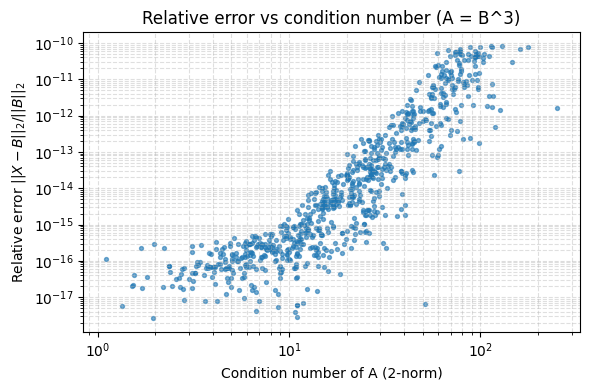

Saved plot error_vs_cond.png


In [71]:
N = 3
n_samples = 1200  # >=1000
Bs, As = create_dataset_B_pow_N(n_samples=n_samples, N=N)

# Оценим корни и соберём статистику
df, Xs = evaluate_roots(Bs, As, N, tol=1e-10, maxiter=1000)
# Сохраняем таблицу для дальнейшего анализа
df.to_csv("roots_errors_cond.csv", index=False)
print("Saved roots_errors_cond.csv; summary:")
print(df.describe())

# Построим график относительной ошибки vs обусловленности (log-log)
df_plot = df.dropna(subset=['rel_error'])
plt.figure(figsize=(6,4))
plt.scatter(df_plot['condA'], df_plot['rel_error'], s=8, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Condition number of A (2-norm)')
plt.ylabel('Relative error $||X - B||_2 / ||B||_2$')
plt.title(f'Relative error vs condition number (A = B^{N})')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.tight_layout()
plt.show()
print("Saved plot error_vs_cond.png")


In [77]:
def perturbation_study(A, B, N, n_trials=1000, eps=0.01):
    """
    Для заданной A и истинного B генерирует n_trials возмущений E ~ U([-eps,eps]) по каждому элементу,
    считает X(A+E) методом Ньютона и возвращает массивы norms_E и norms_diff, где:
      norms_E[i] = ||E||_2, norms_diff[i] = ||X(A+E) - B||_2 (nan если не сошлось)
    """
    norms_E = np.empty(n_trials)
    norms_diff = np.empty(n_trials)
    for i in range(n_trials):
        E = np.random.uniform(-eps, eps, size=(2,2))
        norms_E[i] = la.norm(E, 2)
        Xp, success = matrix_pth_root_newton(A + E, N)
        if not success or Xp is None:
            norms_diff[i] = np.nan
        else:
            norms_diff[i] = la.norm(Xp - B, 2)
    return norms_E, norms_diff


High cond index, cond: 518 1143311.062189005
Low cond index, cond: 1072 1.0999295089120875


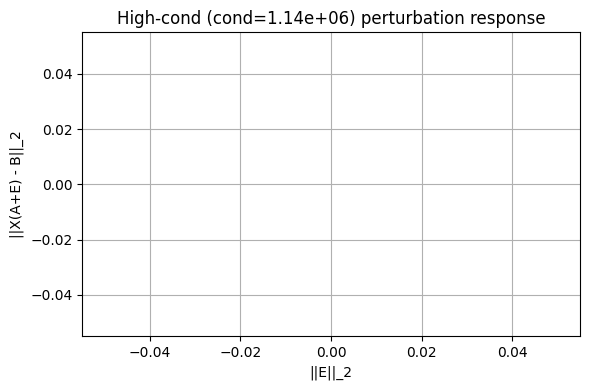

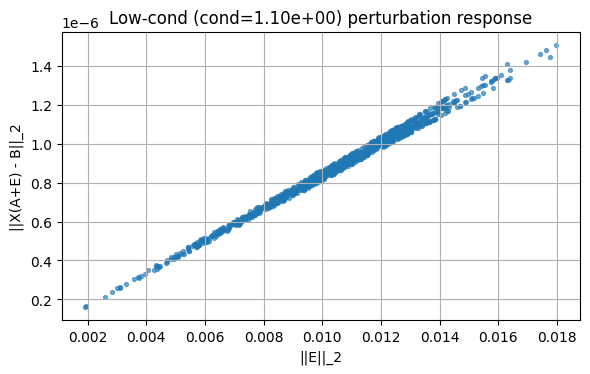

In [79]:
idx_max = int(df['condA'].idxmax())
idx_min = int(df['condA'].idxmin())
A_high, B_high = As[idx_max], Bs[idx_max]
A_low, B_low = As[idx_min], Bs[idx_min]
print("High cond index, cond:", idx_max, df.loc[idx_max, 'condA'])
print("Low cond index, cond:", idx_min, df.loc[idx_min, 'condA'])

# perturbation experiments (1000 возмущений)
normsE_high, diffs_high = perturbation_study(A_high, B_high, N, n_trials=1000, eps=0.01)
normsE_low, diffs_low = perturbation_study(A_low, B_low, N, n_trials=1000, eps=0.01)

# Сохраним результаты
np.savez("perturb_high_low.npz",
            normsE_high=normsE_high, diffs_high=diffs_high,
            normsE_low=normsE_low, diffs_low=diffs_low,
            idx_max=idx_max, idx_min=idx_min)

# Построение scatter-plotов (норма ошибки vs норма возмущения)
plt.figure(figsize=(6,4))
plt.scatter(normsE_high, diffs_high, s=8, alpha=0.6)
plt.xlabel('||E||_2')
plt.ylabel('||X(A+E) - B||_2')
plt.title(f'High-cond (cond={df.loc[idx_max,"condA"]:.2e}) perturbation response')
plt.grid(True)
plt.tight_layout()
plt.savefig("perturb_high.png", dpi=200)

plt.figure(figsize=(6,4))
plt.scatter(normsE_low, diffs_low, s=8, alpha=0.6)
plt.xlabel('||E||_2')
plt.ylabel('||X(A+E) - B||_2')
plt.title(f'Low-cond (cond={df.loc[idx_min,"condA"]:.2e}) perturbation response')
plt.grid(True)
plt.tight_layout()
plt.show()